In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
df= pd.read_csv('https://raw.githubusercontent.com/mahesh147/Support-Vector-Machine/master/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
le = preprocessing.LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


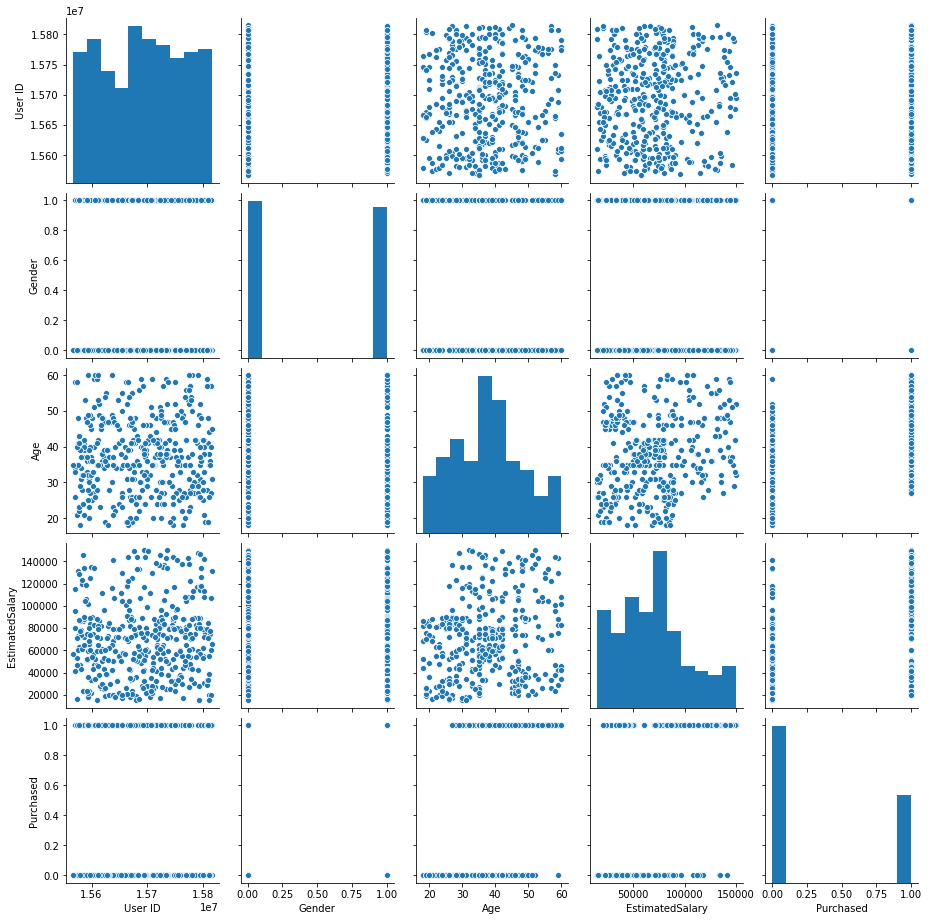

In [5]:
sns.pairplot(df)

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

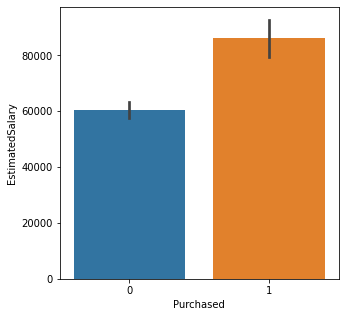

In [6]:
plt.figure(figsize=(5,5))
sns.barplot(x=df['Purchased'],y=df['EstimatedSalary'])

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

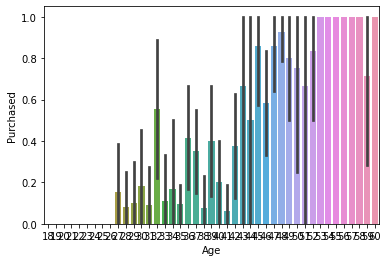

In [7]:
sns.barplot(x=df['Age'],y=df['Purchased'])

In [8]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [9]:
df.drop('User ID', axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


# Separating dependent and independent variables

In [11]:
X = df.drop('Purchased',axis=1)
Y = df['Purchased']
print(X)
print(Y)

     Gender  Age  EstimatedSalary
0         1   19            19000
1         1   35            20000
2         0   26            43000
3         0   27            57000
4         1   19            76000
..      ...  ...              ...
395       0   46            41000
396       1   51            23000
397       0   50            20000
398       1   36            33000
399       0   49            36000

[400 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


# Dividing data into train and test set

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=1,)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(320, 3)
(80, 3)
(320,)
(80,)


# Making SVM classifier

In [14]:
clf = svm.SVC()
clf.fit(X_train, Y_train)

SVC()

In [15]:
Y_pred = clf.predict(X_test)

In [16]:
print("mean_squared_error: ",mean_squared_error(Y_test, Y_pred))
print("mean_absolute_error: ",mean_absolute_error(Y_test, Y_pred))
print("r2 score: ",r2_score(Y_test, Y_pred))

mean_squared_error:  0.3
mean_absolute_error:  0.3
r2 score:  -0.24999999999999978
